In [1]:
import pandas as pd

df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/3023/American_Race_Gender_Population.csv')
df.head()

,Age Group,State,Gender,Race,Year,Population,Mean Age
0,1-4,Alabama,Female,American Indian or Alaska Native,1990,419.0,2.5
1,1-4,Alabama,Female,American Indian or Alaska Native,1991,445.0,2.5
2,1-4,Alabama,Female,American Indian or Alaska Native,1992,379.0,2.5
3,1-4,Alabama,Female,American Indian or Alaska Native,1993,344.0,2.5
4,1-4,Alabama,Female,American Indian or Alaska Native,1994,352.0,2.5


In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

fontsize=20
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.top']=False

### Population by race/state

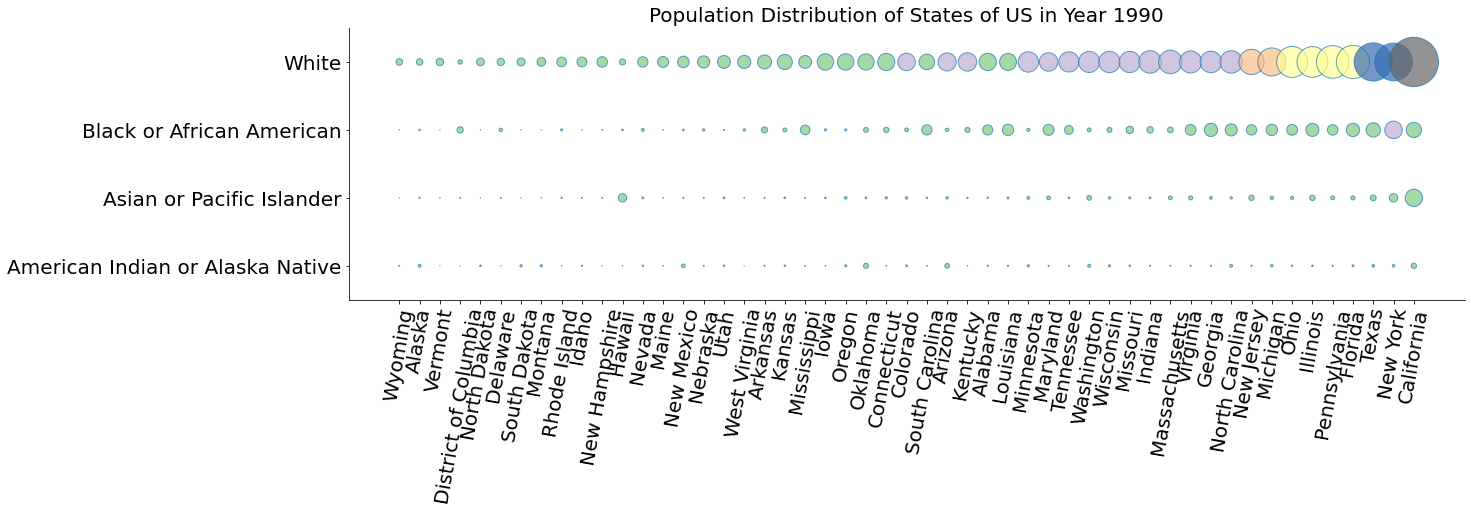

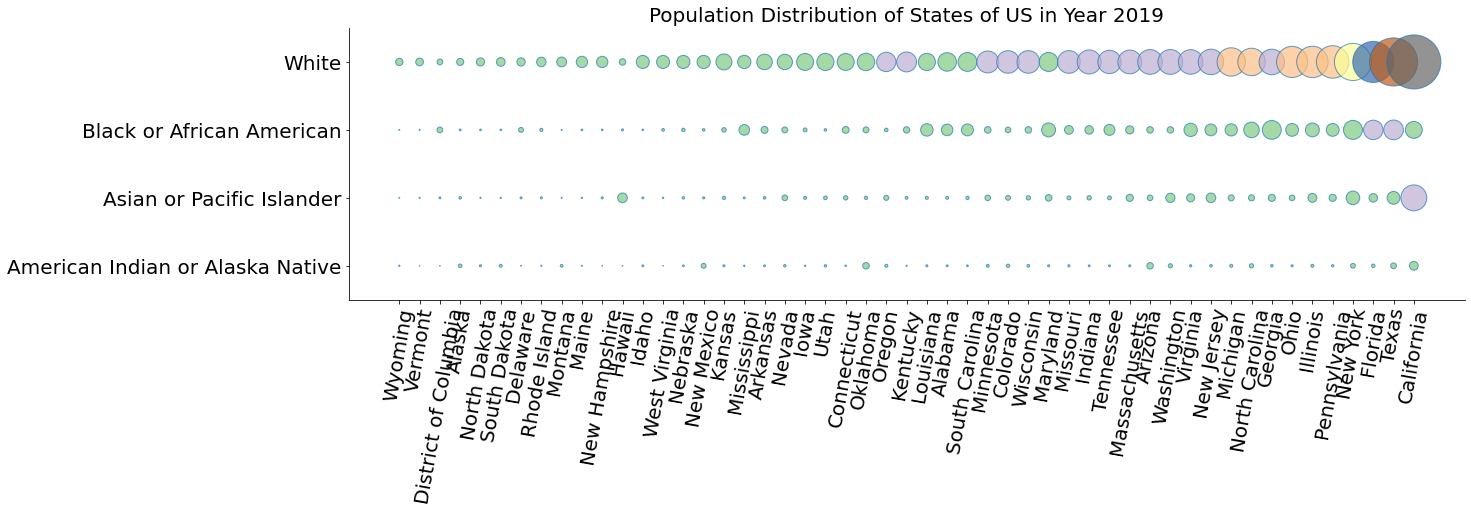

In [3]:
plt.rcParams['figure.figsize']=(20,5)

for year in [1990,2019]:
    data=df.loc[df['Year']==year]
    state_order=data.groupby(['State'])['Population'].sum().sort_values().index
    data['State']=data['State'].astype(pd.api.types.CategoricalDtype(state_order,ordered=True))
    data=data.groupby(['State','Race'],as_index=False)['Population'].sum().sort_values(['State'])
    plt.scatter(x=data['State'],y=data['Race'],c=data['Population'],s=data['Population']*.0001,ec='tab:blue',cmap=plt.cm.Accent,alpha=.7)
    ax=plt.gca()
    ax.tick_params(axis='x',rotation=80)
    ax.set_ylim(-.5,3.5)
    plt.title('Population Distribution of States of US in Year %d'%year)
    plt.show()

### Population Change

In [4]:
data=df.loc[(df['Year']==1990)|(df['Year']==2019)]

pop_change=data.pivot_table(index='State',columns='Year',values='Population',aggfunc='sum')
pop_change['Population Changed %']=100*(pop_change[2019]-pop_change[1990])/pop_change[1990]
pop_change

Year,1990,2019,Population Changed %
State,,,
Alabama,4050055.0,4903185.0,21.064652
Alaska,553290.0,731545.0,32.217282
Arizona,3684097.0,7278717.0,97.571264
Arkansas,2356586.0,3017804.0,28.058301
California,29959515.0,39512223.0,31.885389
Colorado,3307618.0,5758736.0,74.105232
Connecticut,3291967.0,3565287.0,8.302635
Delaware,669567.0,973764.0,45.431899
District of Columbia,605321.0,705749.0,16.590867


In [5]:
pop=df.loc[df['Year']==2019].groupby(['State'])['Population'].sum()
data=pd.concat([pop,pop_change],axis=1)[['Population','Population Changed %']]
data.head()

,Population,Population Changed %
State,,
Alabama,4903185.0,21.064652
Alaska,731545.0,32.217282
Arizona,7278717.0,97.571264
Arkansas,3017804.0,28.058301
California,39512223.0,31.885389


Text(0.5, 1.0, 'Population change from 1990 to 2019 in US')

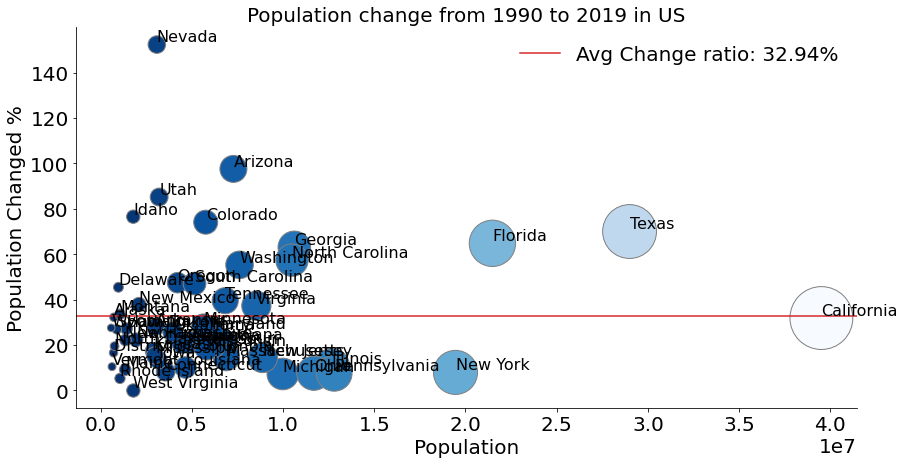

In [9]:
plt.rcParams['figure.figsize']=(14,7)

plt.scatter(x=data['Population'],y=data['Population Changed %'],marker='o',c=data['Population'],s=data['Population']*.0001,cmap=plt.cm.Blues_r,edgecolors='gray')
plt.xlabel('Population')
plt.ylabel('Population Changed %')
plt.axhline(y=data['Population Changed %'].mean(),color='tab:red',label='Avg Change ratio: %.2f%%'%(data['Population Changed %'].mean()))
plt.legend()

x=data['Population']
y=data['Population Changed %']
s=data.index

for xpos,ypos,text in zip(x,y,s):
    plt.text(xpos,ypos,text,size=16,va='bottom',ha='left')
plt.title('Population change from 1990 to 2019 in US')

Text(0.5, 1.0, 'log Population change from 1990 to 2019 in US')

posx and posy should be finite values
posx and posy should be finite values


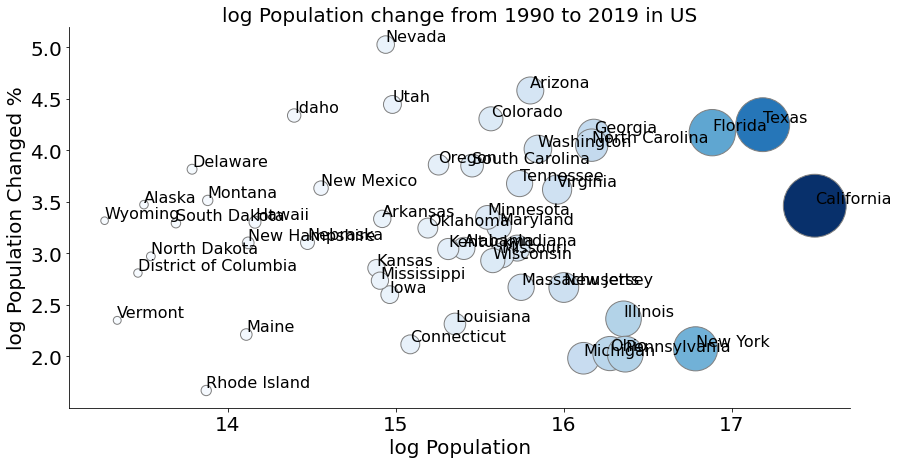

In [11]:
import numpy as np
plt.rcParams['figure.figsize']=(14,7)

x=np.log(data['Population'])
y=np.log(data['Population Changed %'])

plt.scatter(x,y,marker='o',c=data['Population'],s=data['Population']*.0001,cmap=plt.cm.Blues,edgecolors='gray',label='changed of states in US')
plt.xlabel('log Population')
plt.ylabel('log Population Changed %')

s=data.index

for xpos,ypos,text in zip(x,y,s):
    plt.text(xpos,ypos,text,size=16,va='bottom',ha='left')
plt.title('log Population change from 1990 to 2019 in US')

### Population by races

#### White

In [12]:
data=df.loc[(df['Year']==1990)|(df['Year']==2019)]

white_change=data.loc[data['Race']=='White'].pivot_table(index='State',columns='Year',values='Population',aggfunc='sum')
white_change['White Changed %']=100*(white_change[2019]-white_change[1990])/white_change[1990]
white_change

Year,1990,2019,White Changed %
State,,,
Alabama,2987764.0,3437480.0,15.051925
Alaska,423276.0,503476.0,18.947448
Arizona,3293186.0,6118935.0,85.805934
Arkansas,1956611.0,2426008.0,23.990308
California,24354238.0,29203765.0,19.912456
Colorado,3077815.0,5099538.0,65.686956
Connecticut,2949149.0,2886404.0,-2.127563
Delaware,543973.0,686304.0,26.165085
District of Columbia,191834.0,330479.0,72.273424


In [13]:
changed=pd.concat([pop_change,white_change],axis=1)
changed=changed[['Population Changed %','White Changed %']]
changed.head()

Year,Population Changed %,White Changed %
State,,
Alabama,21.064652,15.051925
Alaska,32.217282,18.947448
Arizona,97.571264,85.805934
Arkansas,28.058301,23.990308
California,31.885389,19.912456


Text(155, 120, 'Nevada')

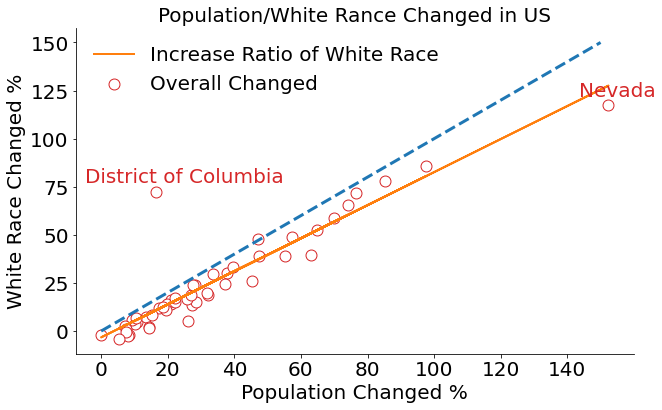

In [17]:
plt.rcParams['figure.figsize']=(10,6)

x=changed['Population Changed %']
y=changed['White Changed %']

plt.scatter(x,y,marker='o',s=120,edgecolors='tab:red',facecolor='white',label='Overall Changed')
plt.xlabel('Population Changed %')
plt.ylabel('White Race Changed %')

f_1=np.polyfit(x,y,deg=1)
plt.plot(x,np.polyval(f_1,x),lw=2,color='tab:orange',label='Increase Ratio of White Race')
plt.plot(np.linspace(0,150,20),np.linspace(0,150,20),color='tab:blue',ls='--',lw=3)
plt.legend()
plt.title('Population/White Rance Changed in US')

plt.text(25,75,'District of Columbia',fontsize=20,color='tab:red',ha='center',va='bottom')
plt.text(155,120,'Nevada',fontsize=20,color='tab:red',ha='center',va='bottom')

### All races

In [21]:
changed=data.pivot_table(index='State',columns='Year',values='Population',aggfunc='sum')
changed['Population Changed %']=100*(changed[2019]-changed[1990])/changed[1990]

race_columns=['Population Changed %']
for race in ['American Indian or Alaska Native','Asian or Pacific Islander','Black or African American','White']:
    race_change=data.loc[data['Race']==race].pivot_table(index='State',columns='Year',values='Population',aggfunc='sum')
    race_change[race+' Changed %']=100*(race_change[2019]-race_change[1990])/race_change[1990]
    changed=pd.concat([changed,race_change],axis=1)
    race_columns.append(race+' Changed %')
changed=changed[race_columns]
changed.head()

Year,Population Changed %,American Indian or Alaska Native Changed %,Asian or Pacific Islander Changed %,Black or African American Changed %,White Changed %
State,,,,,
Alabama,21.064652,135.798817,289.331931,31.059229,15.051925
Alaska,32.217282,47.064691,217.124410,58.636664,18.947448
Arizona,97.571264,91.725016,436.006760,270.124184,85.805934
Arkansas,28.058301,178.132082,442.256511,30.806671,23.990308
California,31.885389,167.208411,123.198473,22.854617,19.912456


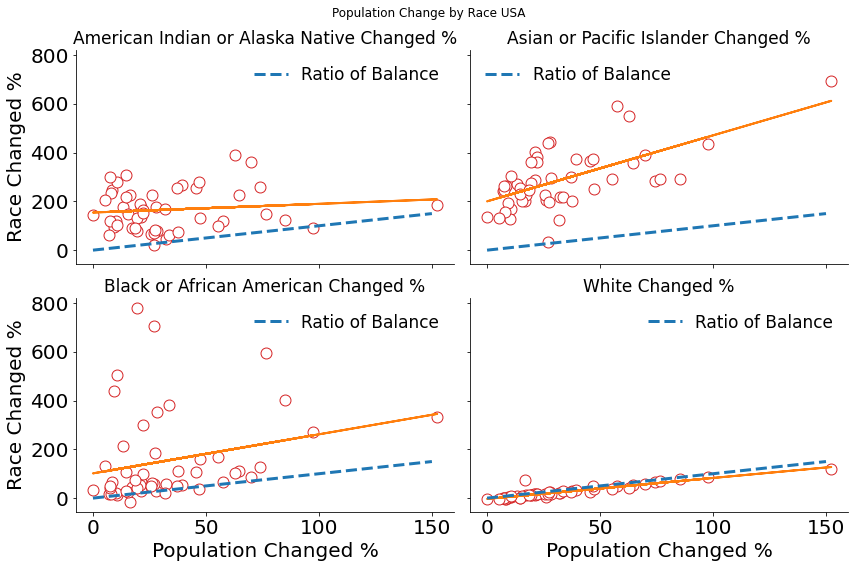

In [22]:
plt.rcParams['figure.figsize']=(12,8)
fig,axs=plt.subplots(2,2,sharex=True,sharey=True)
axs=axs.ravel()
x=changed['Population Changed %']

for i,race in enumerate(race_columns[1:]):
    ax=axs[i]
    y=changed[race]
    ax.scatter(x,y,marker='o',s=120,edgecolors='tab:red',facecolors='white')
    f_1=np.polyfit(x,y,deg=1)
    ax.plot(x,np.polyval(f_1,x),lw=2,color='tab:orange')
    ax.plot(np.linspace(0,150,20),np.linspace(0,150,20),color='tab:blue',label='Ratio of Balance',ls='--',lw=3)
    ax.legend(fontsize=17)
    ax.set_title(race,fontsize=17)
    if i in [2,3]:
        ax.set_xlabel('Population Changed %')
    if i in [0,2]:
        ax.set_ylabel('Race Changed %')
fig.suptitle('Population Change by Race USA')
plt.tight_layout()

In [24]:
race_changes=pd.DataFrame()

for race in ['American Indian or Alaska Native','Asian or Pacific Islander','Black or African American','White']:
    race_change=data.loc[data['Race']==race].pivot_table(index='State',columns='Year',values='Population',aggfunc='sum')
    race_change['Race Changed %']=100*(race_change[2019]-race_change[1990])/race_change[1990]
    race_change['Race']=race
    race_change=pd.concat([changed,race_change],axis=1)
    race_changes=pd.concat([race_changes,race_change],axis=0)
race_changes=race_changes[['Population Changed %','Race Changed %','Race']]
race_changes.head()

Year,Population Changed %,Race Changed %,Race
State,,,
Alabama,21.064652,135.798817,American Indian or Alaska Native
Alaska,32.217282,47.064691,American Indian or Alaska Native
Arizona,97.571264,91.725016,American Indian or Alaska Native
Arkansas,28.058301,178.132082,American Indian or Alaska Native
California,31.885389,167.208411,American Indian or Alaska Native


Text(0.5, 1.0, 'Population Change by Race USA')

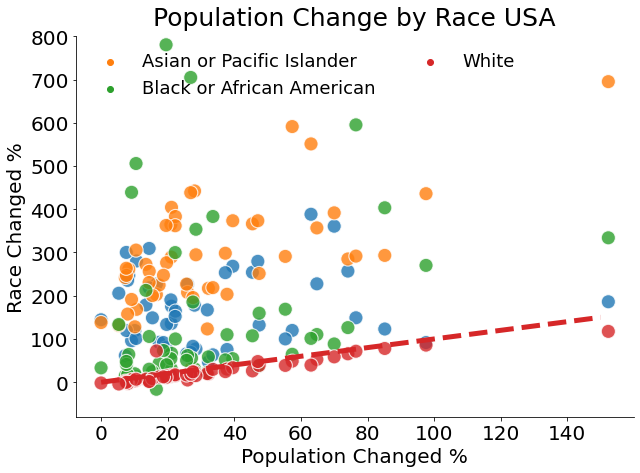

In [25]:
import seaborn as sns
plt.rcParams['figure.figsize']=(10,7)

sns.scatterplot(x='Population Changed %',y='Race Changed %',hue='Race',s=200,alpha=.8,data=race_changes)
plt.ylim(-80,800)
ax=plt.gca()

h,l=ax.get_legend_handles_labels()
ax.legend(h[1:],l[1:],ncol=2,loc=2,fontsize=18)
plt.plot(np.linspace(0,150,20),np.linspace(0,150,20),color='tab:red',label='Ratio of Balance',ls='--',lw=5)
plt.title('Population Change by Race USA',size=25,va='bottom')

### Black and Asian

In [26]:
changed=pd.DataFrame()
race_columns=[]

for race in ['Asian or Pacific Islander', 'Black or African American']:
    race_change=data.loc[data['Race']==race].pivot_table(index='State',columns='Year',values='Population',aggfunc='sum')
    race_change[race+' Changed %']=100*(race_change[2019]-race_change[1990])/race_change[1990]
    changed=pd.concat([changed,race_change],axis=1)
    race_columns.append(race+' Changed %')

changed=changed[race_columns]
changed.head()

Year,Asian or Pacific Islander Changed %,Black or African American Changed %
State,,
Alabama,289.331931,31.059229
Alaska,217.124410,58.636664
Arizona,436.006760,270.124184
Arkansas,442.256511,30.806671
California,123.198473,22.854617


Text(0.5, 1.0, 'Asian & Black Race Changed USA')

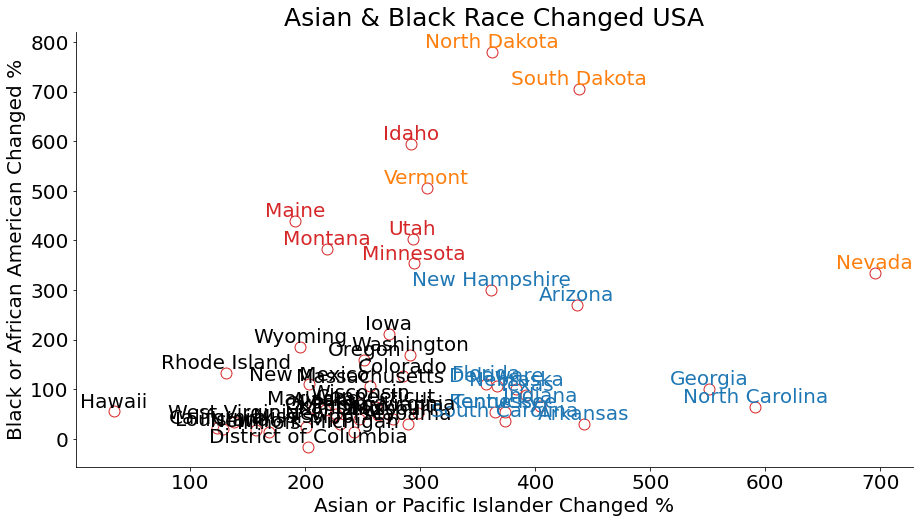

In [29]:
plt.rcParams['figure.figsize']=(15,8)

x=changed['Asian or Pacific Islander Changed %']
y=changed['Black or African American Changed %']
plt.scatter(x,y,marker='o',s=120,edgecolors='tab:red',facecolor='white',label='Changed of States US')
plt.xlabel('Asian or Pacific Islander Changed %')
plt.ylabel('Black or African American Changed %')

for i in range(len(changed)):
    limit_changed=300
    if (changed.iloc[i,0]>limit_changed) & (changed.iloc[i,1]<limit_changed):
        color='tab:blue'
    elif (changed.iloc[i,0]<limit_changed) & (changed.iloc[i,1]>limit_changed):
        color='tab:red'
    elif (changed.iloc[i,0]>limit_changed) & (changed.iloc[i,1]>limit_changed):
        color='tab:orange'
    else:
        color='black'
    plt.text(changed.iloc[i,0],changed.iloc[i,1],changed.index[i],fontsize=20,color=color,ha='center',va='bottom')
plt.title('Asian & Black Race Changed USA',fontsize=25)

### Population by Age

Text(0.5, 1.0, 'Population Distribution by Age')

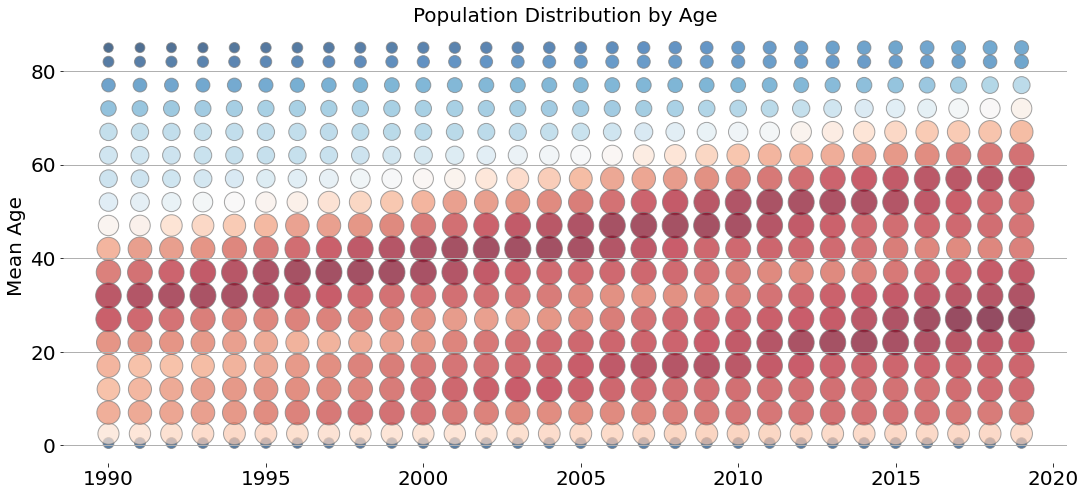

In [30]:
plt.rcParams['figure.figsize']=(18,8)
data=df
data=data.groupby(['Year','Mean Age'],as_index=False)['Population'].sum().sort_values(['Population'])
plt.scatter(x=data['Year'],y=data['Mean Age'],c=data['Population'],s=data['Population']*.00003,ec='tab:gray',cmap=plt.cm.RdBu_r,alpha=.7)
ax=plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(b=True,axis='y',lw=1)
plt.ylabel('Mean Age')
plt.title('Population Distribution by Age')

In [34]:
from pyecharts import options as opts
from pyecharts.charts import Funnel

data=df.loc[df['Year']==1990]

data['Age Group3']=pd.cut(data['Mean Age'],bins=[0,20,40,70,100],labels=['Youth(<20)','Prime(20-40)','Middle(40-70)','Old(>70)'])
data=data.groupby(['Age Group3'],as_index=False)['Population'].sum()
data['Population']=data['Population']/np.sum(data['Population'])*100

funel=Funnel()
funel.add(' ',[list(z) for z in zip(data['Age Group3'],data['Population'])],sort_='none',label_opts=opts.LabelOpts(position='inside'))
funel.set_global_opts(title_opts=opts.TitleOpts(title='Population Structure 1990 US'),legend_opts=opts.LegendOpts(pos_top='5%',textstyle_opts=opts.TextStyleOpts(font_size=15)))
funel.render_notebook()

In [35]:
data=df.loc[df['Year']==2019]

data['Age Group3']=pd.cut(data['Mean Age'],bins=[0,20,40,70,100],labels=['Youth(<20)','Prime(20-40)','Middle(40-70)','Old(>70)'])
data=data.groupby(['Age Group3'],as_index=False)['Population'].sum()
data['Population']=data['Population']/np.sum(data['Population'])*100

funel=Funnel()
funel.add(' ',[list(z) for z in zip(data['Age Group3'],data['Population'])],sort_='none',label_opts=opts.LabelOpts(position='inside'))
funel.set_global_opts(title_opts=opts.TitleOpts(title='Population Structure 2019 US'),legend_opts=opts.LegendOpts(pos_top='5%',textstyle_opts=opts.TextStyleOpts(font_size=15)))
funel.render_notebook()

### New Born

In [38]:
data=df
data=data.loc[data['Mean Age']<3]
state_data=pd.DataFrame()
for state in list(set(data['State'])):
    tmp=data.loc[data['State']==state].groupby(['Year'],as_index=False)['Population'].sum()
    tmp['Population Last Year']=tmp.shift()['Population']
    tmp['Birth Ratio %']=100*(tmp['Population']-tmp['Population Last Year'])/tmp['Population Last Year']
    tmp['Birth Ratio %'].fillna(value=0,inplace=True)
    tmp['State']=state
    state_data=pd.concat([state_data,tmp])
state_data=state_data.sort_values('Population')
state_data.head()

,Year,Population,Population Last Year,Birth Ratio %,State
29,2019,29043.0,29625.0,-1.964557,Vermont
28,2018,29625.0,30004.0,-1.263165,Vermont
27,2017,30004.0,30234.0,-0.760733,Vermont
26,2016,30234.0,30539.0,-0.998723,Vermont
25,2015,30539.0,30609.0,-0.228691,Vermont


Text(0.5, 1.0, 'Birth Ratio from 1990 to 2019 US')

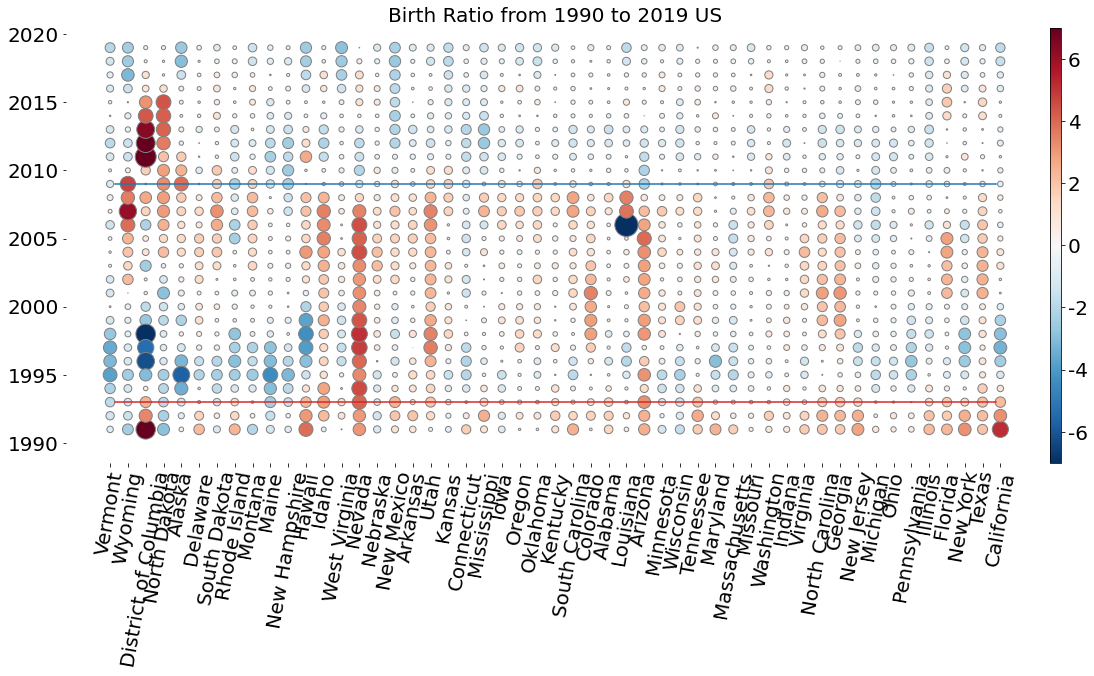

In [39]:
plt.rcParams['figure.figsize']=(18,8)
ax=plt.figure().add_subplot(111)
mappable=ax.scatter(x=state_data['State'],y=state_data['Year'],c=state_data['Birth Ratio %'],s=np.abs(state_data['Birth Ratio %'])*50,ec='gray',vmin=-7,vmax=7,cmap=plt.cm.RdBu_r)
ax.tick_params(axis='x',rotation=80)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axhline([1993],xmin=.05,xmax=.95,color='tab:red')
ax.axhline([2009],xmin=.05,xmax=.95,color='tab:blue')
cbar=plt.colorbar(mappable=mappable,ax=ax,aspect=40,pad=.005,fraction=.02)
ax.set_title('Birth Ratio from 1990 to 2019 US')

### Population by Gender

Text(0.5, 0.98, 'Population by Gender US')

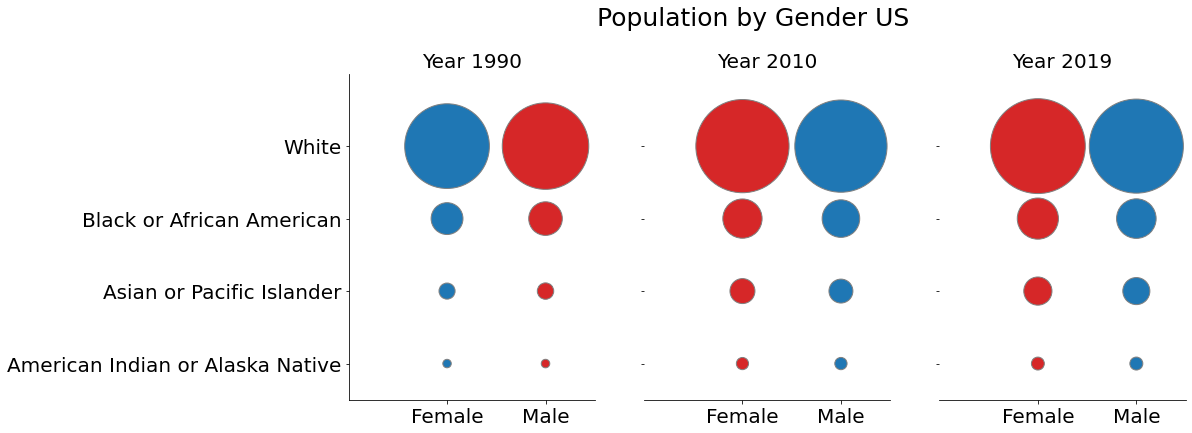

In [41]:
fig,axs=plt.subplots(1,3,figsize=(15,6),sharey=True,sharex=True)

for i,year in enumerate([1990,2010,2019]):
    ax=axs[i]
    data=df.loc[df['Year']==year].groupby(['Gender','Race'],as_index=False)['Population'].sum().sort_values('Population')
    ax.scatter(x=data['Gender'],y=data['Race'],c=data['Gender'].apply(lambda x: 'tab:red' if x=='Female' else 'tab:blue'),s=data['Population']*.00007,ec='gray')
    ax.set_ylim(-.5,4)
    ax.set_xlim(-1,1.5)
    ax.set_title('Year %d'%year)
    if i>0:
        ax.spines['left'].set_visible(False)
fig.suptitle('Population by Gender US',size=25,va='bottom')